In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'


season = 22
rule = 'single'

df = pd.read_csv(f'output/s{season}_{rule}.csv')
f"全ポケモン {len(df)}, 構築数{len(df)/6}"

'全ポケモン 1296, 構築数216.0'

In [99]:
df = df.dropna(subset=['move_0'])
f"技データあり {len(df)}, 構築数{len(df)/6}"

'技データあり 774, 構築数129.0'

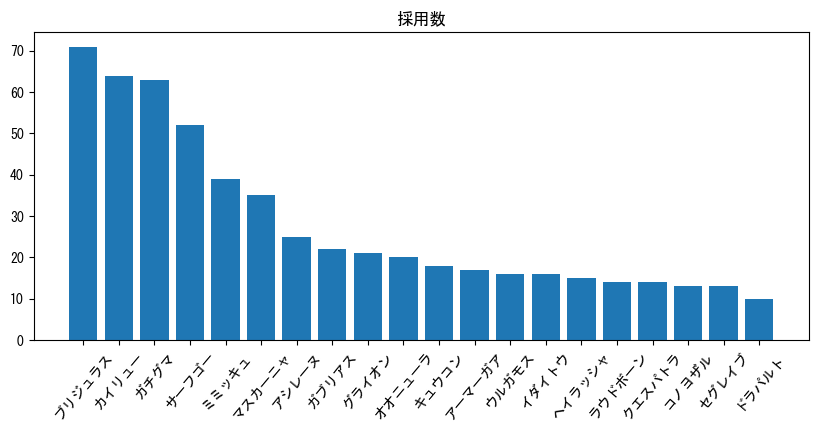

In [100]:
s = df['pokemon'].value_counts()
n = 20
plt.figure(figsize=(10,4))
plt.bar(s.index[:n], s.values[:n])
plt.title('採用数')
_ = plt.xticks(rotation=50)

特定のポケモンに焦点を当てる

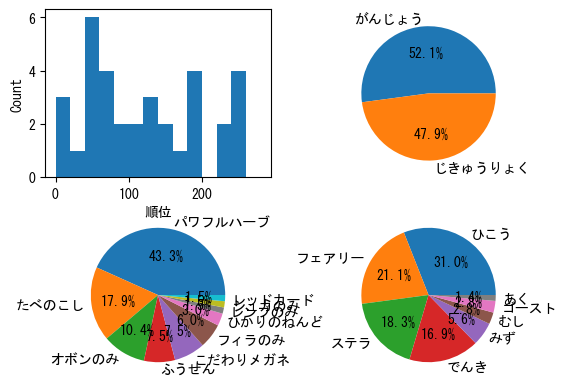

In [101]:
name = 'ブリジュラス'
df1 = df[df['pokemon'] == name]

# 採用数
plt.subplot(2, 2, 1)
plt.hist(df1['rank'].values, bins=range(0,300,20))
plt.xlabel('順位')
plt.ylabel('Count')

# 特性
plt.subplot(2, 2, 2)
s = df1['ability'].value_counts()
plt.pie(s.values, labels=s.index, autopct='%.1f%%')

# アイテム
plt.subplot(2, 2, 3)
s = df1['item'].value_counts()[:10]
plt.pie(s.values, labels=s.index, autopct='%.1f%%')

# テラスタイプ
plt.subplot(2, 2, 4)
s = df1['terastal'].value_counts()[:10]
_ = plt.pie(s.values, labels=s.index, autopct='%.1f%%')

技を確認する

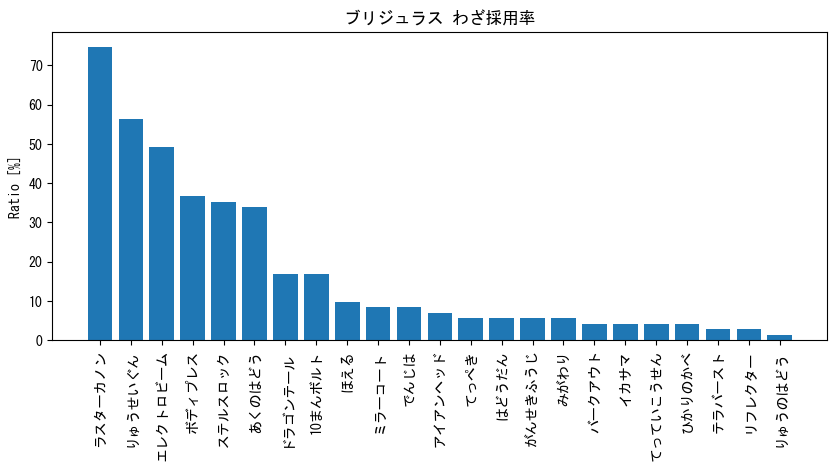

In [102]:
# 技
plt.figure(figsize=(10,4))
s = df1[f'move_0']
for i in range(1, 4):
    s = pd.concat([s, df1[f'move_{i}']])
s = s.value_counts()/len(df1)*100
plt.bar(s.index, s.values)
plt.title(f'{name} わざ採用率')
plt.ylabel('Ratio [%]')
_ = plt.xticks(rotation=90)

もとのDataFrameに型を追加

In [103]:
df['class'] = None

zanpan_items = ['たべのこし','くろいヘドロ']
recovery_fruits = ['オレンのみ','オボンのみ','フィラのみ','ウイのみ','マゴのみ','バンジのみ','イアのみ']
half_fruits = ['ホズのみ','リンドのみ','オッカのみ','イトケのみ','ソクノのみ','カシブのみ',
               'ヨロギのみ','タンガのみ','ウタンのみ','バコウのみ','シュカのみ','ビアーのみ',
               'ヨプのみ','ヤチェのみ','リリバのみ','ナモのみ','ハバンのみ','ロゼルのみ']

for idx, row in df.iterrows():
    ability = row['ability']
    item = row['item']
    #moves = [row[f'move_{i}'] for i in range(4)]

    # 似た要素をまとめる
    if item in zanpan_items:
        item = zanpan_items[0]
    elif item in recovery_fruits:
        item = '回復実'
    elif item in half_fruits:
        item = '半減実'
    
    # 略称
    if item[:4] in ['こだわり','とつげき']:
        item = item[4:]
    if item[-2:] == 'のみ':
        item = item[:-2]

    df.at[idx, 'class'] = f"{ability}/{item}"

df1 = df[df['pokemon'] == name]

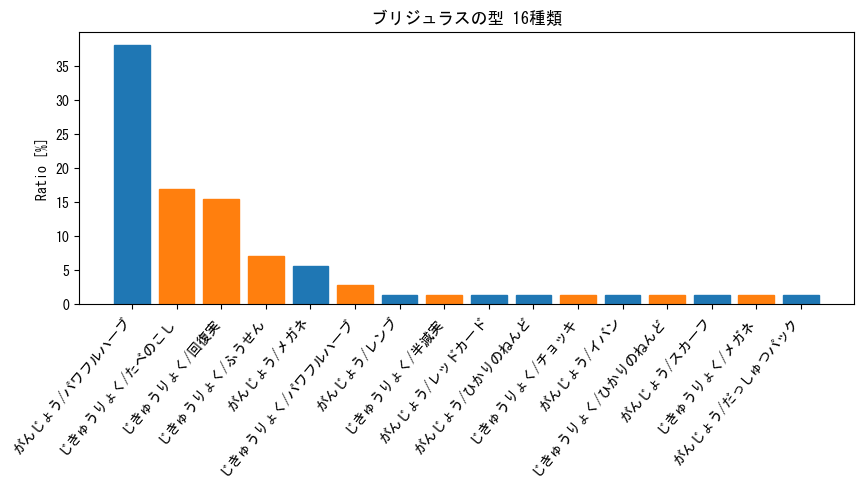

In [104]:
s = df1['class'].value_counts()/len(df1)*100
fig, ax = plt.subplots(figsize=(10,4))
rect = ax.bar(s.index, s.values)
ax.set_title(f"{name}の型 {len(s)}種類")
ax.set_ylabel('Ratio [%]')
fig.autofmt_xdate(rotation=50)

# 色分け
abilities = df1['ability'].value_counts().index.to_list()
for i, r in enumerate(rect):
    color_id = abilities.index(s.index[i].split('/')[0])
    r.set_color(f"C{color_id}")

型ごとに技を集計

In [105]:
s = df1[f'move_0']
for i in range(1, 4):
    s = pd.concat([s, df1[f'move_{i}']])
moves = s.value_counts().index.to_list()

data = {}

classes = df1['class'].value_counts()
for i in classes.index:
    data[i] = [0]*len(moves)

for idx, row in df1.iterrows():
    for i in range(4):
        data[row['class']][moves.index(row[f"move_{i}"])] += 1

df2 = pd.DataFrame(data, pd.Index(moves))

# 割合に変換
df2 = df2/classes.values

df2[:3]

,がんじょう/パワフルハーブ,じきゅうりょく/たべのこし,じきゅうりょく/回復実,じきゅうりょく/ふうせん,がんじょう/メガネ,じきゅうりょく/パワフルハーブ,がんじょう/レンブ,じきゅうりょく/半減実,がんじょう/レッドカード,がんじょう/ひかりのねんど,じきゅうりょく/チョッキ,がんじょう/イバン,じきゅうりょく/ひかりのねんど,がんじょう/スカーフ,じきゅうりょく/メガネ,がんじょう/だっしゅつパック
ラスターカノン,0.962963,0.50,0.818182,0.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
りゅうせいぐん,0.888889,0.25,0.090909,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
エレクトロビーム,1.000000,0.25,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


C:\Users\tmtmh\AppData\Local\Temp\ipykernel_12652\3407449720.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=0)


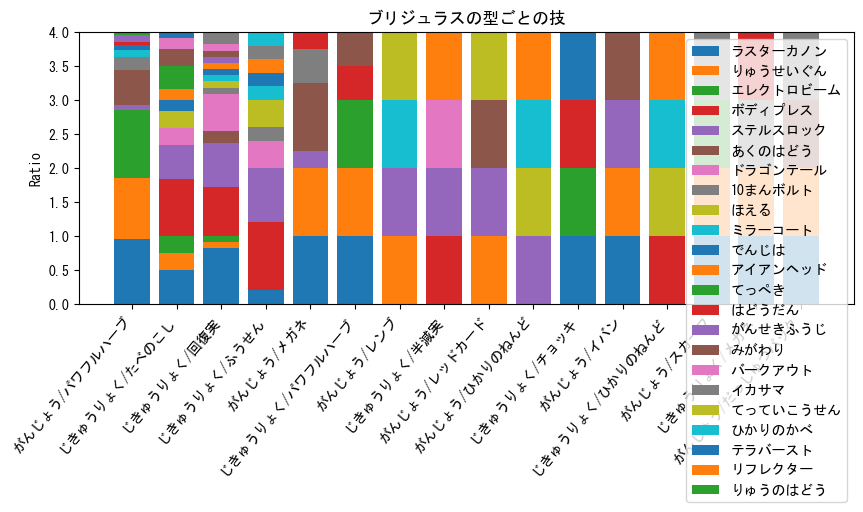

In [106]:
fig, ax = plt.subplots(figsize=(10,4))
ax.legend(loc=0)

# 規格化
#df2 /= df2.sum()
df2 = df2.T

bottom = np.zeros_like(df2.index)
for move in df2.columns:
    ax.bar(df2.index, df2[move], bottom=bottom, label=move)
    bottom += df2[move]

ax.set_title(f"{name}の型ごとの技")
ax.set_ylabel('Ratio')
fig.autofmt_xdate(rotation=50)
ax.legend()

ポケモンの型の並び

C:\Users\tmtmh\AppData\Local\Temp\ipykernel_12652\1773905884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['class'] = df3['pokemon'] + '/' + df3['item']


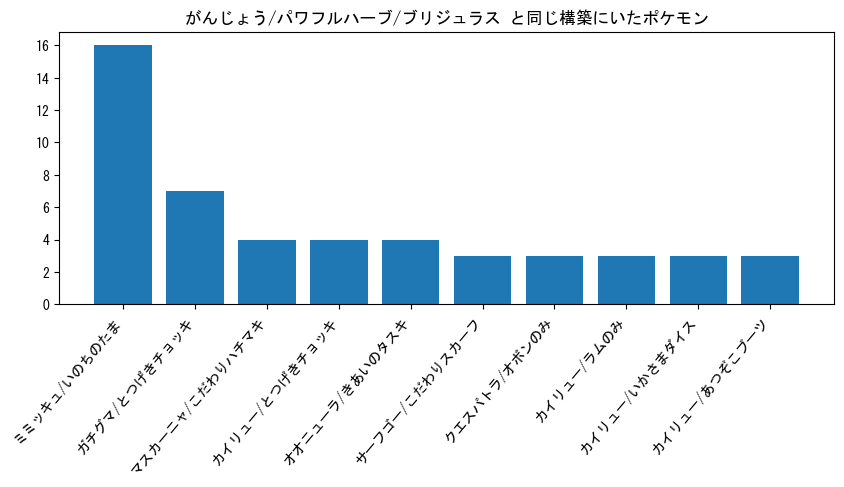

In [107]:
name = 'ブリジュラス'
cls = 'がんじょう/パワフルハーブ'
n = 10

df3 = df[(df['pokemon'] == name) & (df['class'] == cls)]
df3 = df[(df['rank'].isin(df3['rank'])) & (df['pokemon'] != name)]
df3['class'] = df3['pokemon'] + '/' + df3['item']
sr = df3['class'].value_counts()

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(sr.index[:n], sr.values[:n])
ax.set_title(f"{cls}/{name} と同じ構築にいたポケモン")
fig.autofmt_xdate(rotation=50)